In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [34]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("tt.csv", header=None, names=col_names)

In [35]:
pima=pima.drop(0,axis=0)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [58]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
pima['label']=pd.to_numeric(pima['label'])
y = pima.label # Target variable

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [60]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
#confusion matrics

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

Text(0.5, 257.44, 'Predicted label')

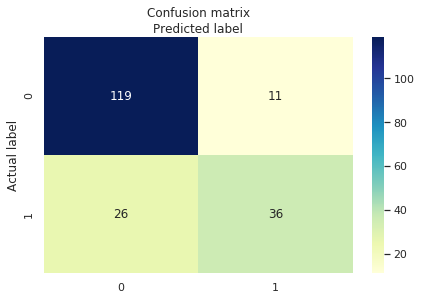

In [62]:
#visulisation of confusion matrics

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
y_test=np.array(y_test)
y_pred=np.array(y_pred)
print(type(y_pred[0]))

<class 'numpy.int64'>


In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

#print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106


In [76]:
z=y_test[y_test[:]==0]
print(len(z))

130


In [88]:
s=y_pred[y_pred[:]==1]
print(len(s))

47


In [94]:
fpr=cnf_matrix[0][1]/(cnf_matrix[1][1]+cnf_matrix[0][0])
tpr=cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
fnr=cnf_matrix[1][0]/(cnf_matrix[0][1]+cnf_matrix[0][0])
tnr=cnf_matrix[0][0]/(cnf_matrix[0][1]+cnf_matrix[0][0])

In [95]:
print('fpr:',fpr)
print('tpr:',tpr)
print('fnr:',fnr)
print('tnr:',tnr)

fpr: 0.07096774193548387
tpr: 0.5806451612903226
fnr: 0.2
tnr: 0.9153846153846154


In [91]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro') 


0.7630025020850708

In [93]:
#misclassification rate
misclassification=np.mean(y_test!=y_pred)
print(misclassification)

0.19270833333333334
